
# Bramki wielokubitowe

## Zadanie -  Obwód kwantowy z optymalizacją

- Napisz obwód kwantowy, który zawierać będzie tylko bramkę $R_X$ dla dowolnego parametru $\theta$
- oblicz i uzasadnij, że wartość oczekiwana dla stanu $\ket{\psi} = R_X \, \ket{0}$ 
$$<Z> = cos^2(\theta /2)- sin^2(\theta /2) = cos(\theta)$$


Załóżmy, że nasz problem obliczeniowy sprowadza się do wygenerowania wartości oczekiwanej o wartości 0.5. 

$$
 \textbf{<Z>} = \bra{\psi} \textbf{Z} \ket{\psi} = 0.5
 $$

 

Napisz program znajdujący rozwiązanie - szukający wagę $\theta$ dla naszego obwodu

- Zdefiniuj funkcję kosztu, którą bedziemy minimalizować $(Y - y)^2$
- zainicjuj rozwiązanie $theta=0.01$ i przypisz do tablicy array `np.array(0.01, requires_grad=True)`
- Jako opt wybierz spadek po gradiencie : opt = qml.GradientDescentOptimizer(stepsize=0.1)
- uzyj poniższego kodu do wygenerowania pętli obiczeń 

```python

epochs = 100

for epoch in range(epochs):
    theta = opt.step(cost_fn, theta)

    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")
```

Wersja z optymalizatorem PyTorch

```python
from torch.optim import Adam
import torch

theta = torch.tensor(0.01, requires_grad=True)

optimizer = Adam([theta], lr=0.1)
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = cost_fn(theta)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")
    
```

## Bramki dwukubitowe

$$
\renewcommand{\bra}[1]{\left \langle #1 \right \rvert}
\renewcommand{\ket}[1]{\left \rvert #1 \right \rangle}
\renewcommand{\braket}[2]{\left \langle #1 \middle \rvert #2 \right \rangle}
$$


[O bramkach dwukubitowych wspominaliśmy juz tutaj](https://sebkaz-teaching.github.io/qml2024/lectures/wyklad4.html#bramki-dwukubitowe)

Jedną z bramek realizującą zadania  na dwóch kubitach jest bramka CNOT, która na bazie bitu kontrolnego decyduje czy zastosować operację X do drugiego kubitu.

$$
\text{CNOT} = \begin{bmatrix} 1 \,\, \,\,\, 0 \,\,\,\,\, 0 \,\,\,\,\, 0 \\ 
0\,\, \,\,\, 1 \,\,\,\,\, 0 \,\,\,\,\, 0 \\
0\,\,\,\,\, 0\,\,\,\,\,  0 \,\,\,\,\, 1 \\ 0\,\,\,\,\, 0\,\,\,\,\, 1\,\,\,\,\, 0 \end{bmatrix}
$$

$$ \text{CNOT} \ket{00} = \ket{00} $$

$$ \text{CNOT} \ket{10} = \ket{11} $$



In [2]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    #return qml.state()
    return qml.counts()

qc()

{'00': tensor(38, requires_grad=True), '11': tensor(62, requires_grad=True)}

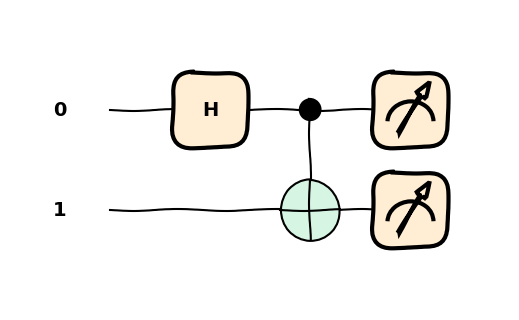

In [3]:
import matplotlib.pyplot as plt
qml.drawer.use_style("sketch")
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [4]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.X(wires=1)
    #return qml.state()
    return qml.counts()

qc()

{'01': tensor(46, requires_grad=True), '10': tensor(54, requires_grad=True)}

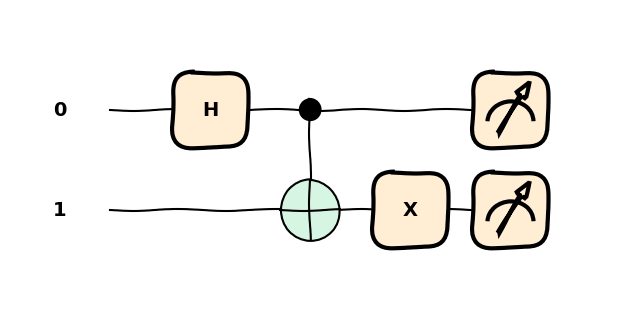

In [5]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [6]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.Z(wires=1)
    #return qml.state()
    return qml.counts()

qc()

{'00': tensor(63, requires_grad=True), '11': tensor(37, requires_grad=True)}

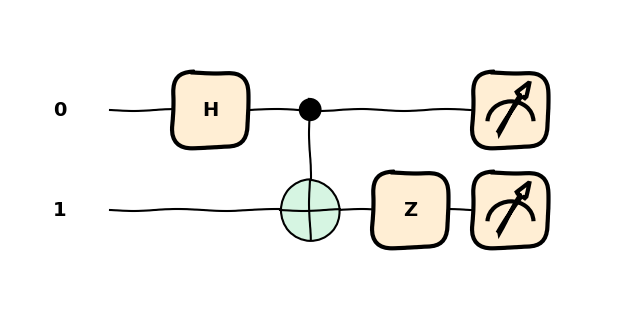

In [7]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [8]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.X(wires=1)
    qml.Z(wires=1)
    #return qml.state()
    return qml.counts()

qc()

{'01': tensor(55, requires_grad=True), '10': tensor(45, requires_grad=True)}

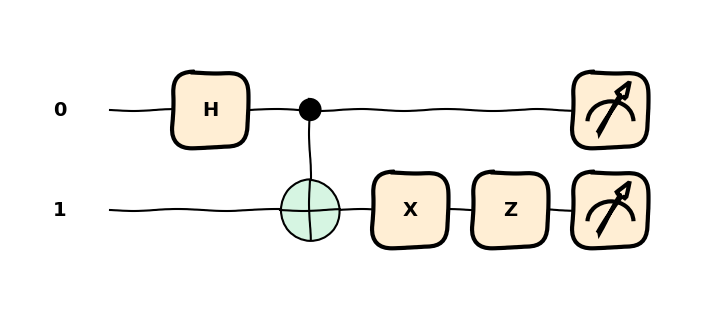

In [9]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

## Zadanie 

utwórz obwód dwu kubitowy:
- bramka CNOT 0,1
- bramka CNOT (odwrocona) 1,0
- bramka CNOT 0,1

Opisz jak działa ta kombinacja na stany: $\ket{00}, \ket{11}, \ket{01},\ket{10}$

Znajdź odpowiednik tej kombinacji w bibliotece Pennylane.

## Zadanie 

utwórz obwód dwu kubitowy:
- bramka CNOT
- bramki H na kazdym kubicie
- bramka CNOT 
- bramki H na kazdym kubicie
- bramka CNOT



## Stany GHZ 

Jak realizują się stany splątane dla więcej niz dwóch kubitów

Stany [Greenbergerha-Hornea-Zeilingera](https://en.wikipedia.org/wiki/Greenberger–Horne–Zeilinger_state)


[publikacja](https://arxiv.org/abs/2106.01550)



In [10]:
dev = qml.device('default.qubit', wires=3, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    #return qml.state()
    return qml.counts()

qc()

{'000': tensor(45, requires_grad=True), '111': tensor(55, requires_grad=True)}

## Kopiowanie Kubitu 

Klasyczne komputery bardzo często wykorzystując operację kopiowania. 

Zobaczmy jak taka operacja wygląda dla kubitów.

Rozwazmy obwod z operatorem `C`, który w działaniu na dwa kubity kopiuje wartość pierwszego kubitu na wynik drugiego. 
Drugi kubit mozna na początku ustawić w dowolnym stanie. 

Chcemy skopiować stan $\ket{\psi_0} = a\ket{0} + b\ket{1}$ 

Stan początkowy układu: $\ket{\psi_0} \otimes \ket{0}$

Chcemy przekształcić na $\ket{\psi_0} \otimes \ket{\psi_0}$ czyli 

$$ 
C \left(\ket{\psi_0} \otimes \ket{0}\right) = \ket{\psi_0} \otimes \ket{\psi_0}
$$

Lewa strona

$$ 
C \left(\ket{\psi_0} \otimes \ket{0}\right) = C\left(   (a\ket{0} + b\ket{1} )  \otimes \ket{0} \right)
$$
$$ 
C\left( a\ket{0} \otimes \ket{0} + b\ket{1}\otimes \ket{0} \right) = a C \left(\ket{0} \otimes \ket{0}\right) + b C \left( \ket{1}\otimes \ket{0}\right)
$$
$$ 
a \ket{00} + b \ket{11}
$$

Prawa strona
$$
\ket{\psi_0} \otimes \ket{\psi_0}  = a^2 \ket{00} + ab\ket{01} + ab\ket{10} + b^2\ket{11}
$$ 

## Zadanie 

### Napisz operator 1+1 na układzie 4 kubitów 

$$
0+0 = 00
$$
$$
0+1 = 01
$$
$$
1+0 = 01
$$
$$
1+1 = 10
$$

zauwaz, ze mamy dwa typy rozwiązań: 

- dwa bity wejsciowe są takie same  (00, 11) i dają na prawym bicie odpowiedzi 0. 
- dwa bity wejsciowe są rózne (10,01) i dają na prawym bicie odpowiedzi 1. 


Aby napisać prawidłowe rozwiązanie musimy stworzyć bramki, które będą rozpoznawać czy dwa kubity są takie same czy tez rózne. Dla przypomnienia - klasycznie rolę taką pełni bramka `XOR`.

| Input 1   | Input 2 | XOR |
| -------- | ------- |--------|
| 0  | 0    |  0|
| 0 | 1    | 1  |
| 1   | 1    | 1 |
| 1   |  0 | 0 |

Podobnie działa bramka CNOT 

In [33]:
dev = qml.device('default.qubit', wires=4, shots=1)

@qml.qnode(dev)
def qc(input='00'):
    if input[0]=='1':
        qml.X(wires=0)
    if input[1]=='1':
        qml.X(wires=1)
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[1,3])
    #return qml.state()
    return qml.counts(wires=[2,3])

qc()

{'00': tensor(1, requires_grad=True)}

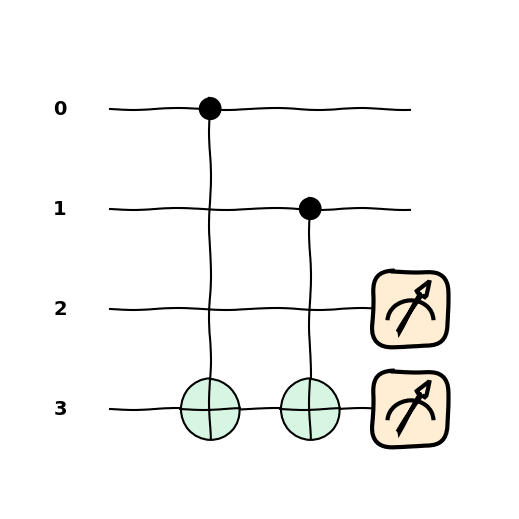

In [34]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [35]:
for input in ['00','01','10','11']:
    print(f"wartosci poczatkowe: {input} : wynik {qc(input)}")

wartosci poczatkowe: 00 : wynik {'00': tensor(1, requires_grad=True)}
wartosci poczatkowe: 01 : wynik {'01': tensor(1, requires_grad=True)}
wartosci poczatkowe: 10 : wynik {'01': tensor(1, requires_grad=True)}
wartosci poczatkowe: 11 : wynik {'00': tensor(1, requires_grad=True)}


Zastosowanie dwóch CNOT do inputów rozwiązuje nam problem prawego bitu odpowiedzi. 

Co z pierszym bitem odpowiedzi otrzymywanym po pomiarzze `q3` ? 

- jego wartość dla pierwszych trzech równań zawsze wynosi 0. 

Jednak dla równania 1+1 powinniśmy otrzymać 1. 

Do rozwiązania tego problemu mozna wykorzystać bramkę operującą na 3 kubitach. 
Bramka ta to bramka `Toffoli`. 

In [36]:
dev = qml.device('default.qubit', wires=4, shots=1)

@qml.qnode(dev)
def qc(input='00'):
    if input[0]=='1':
        qml.X(wires=0)
    if input[1]=='1':
        qml.X(wires=1)
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[1,3])
    qml.Toffoli(wires=[0,1,2])
    #return qml.state()
    return qml.counts(wires=[2,3])

In [37]:
for input in ['00','01','10','11']:
    print(f"wartosci poczatkowe: {input} : wynik {qc(input)}")

wartosci poczatkowe: 00 : wynik {'00': tensor(1, requires_grad=True)}
wartosci poczatkowe: 01 : wynik {'01': tensor(1, requires_grad=True)}
wartosci poczatkowe: 10 : wynik {'01': tensor(1, requires_grad=True)}
wartosci poczatkowe: 11 : wynik {'10': tensor(1, requires_grad=True)}


In [ ]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=4, shots=1)

@qml.qnode(dev)
def qc():
    qml.X(wires=0)
    qml.X(wires=1)
    qml.CNOT([0,1])
    qml.CNOT([0,2])
    qml.Toffoli([0,1,3])
    return qml.counts(wires=[2,3])

qc()

print("wynik 1+1 =",int('10', 2))